In [299]:
## Importamos librerias para el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

## Librerias de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Leemos el dataset en un dataframe
bank = pd.read_csv("bank.csv")

## Feature Engineering

In [300]:
# Que variables son categoricas?
categorical = [var for var in bank.columns if bank[var].dtype=='O']

print('Hay {} Variables categoricas\n'.format(len(categorical)))

print('Las variables categoricas son :', categorical)

Hay 9 Variables categoricas

Las variables categoricas son : ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']


In [301]:
numerical = [var for var in bank.columns if bank[var].dtype!='O']

print('Hay {} variables numericas \n'.format(len(numerical)))

print('The numerical variables are :', numerical)

Hay 8 variables numericas 

The numerical variables are : ['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration', 'Campaign', 'Pdays', 'Previous', 'Subscription']


In [302]:
bank.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000,28381.000000
mean,40.882034,1213.820373,15.787921,214.979564,2.760121,32.818822,0.584194,0.117931
std,10.581758,2814.580789,8.300663,254.334872,3.056762,92.101387,2.494222,0.322532
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,8.000000,58.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,329.000000,16.000000,147.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1238.000000,21.000000,279.000000,3.000000,-1.000000,0.000000,0.000000
max,93.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000,1.000000


## Train test split

In [303]:
# Separamos las features de la variable objetivo
X = bank.drop(['Subscription'], axis=1)

y = bank['Subscription']

In [304]:
# Seleccionamos las variables numericas nuevamente sin la columna Subscription
numerical_x = [var for var in X.columns if X[var].dtype!='O']

In [305]:
# Separamos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((19866, 16), (8515, 16))

In [306]:
# Dividimos las variables categoricas de las numericas para poder realizar scaling y PCA

X_train_cat = X_train[categorical]
X_train_num = X_train[numerical_x]
X_test_cat = X_test[categorical]
X_test_num = X_test[numerical_x]

## Scaling

In [307]:
# Vamos a tener que convertir esta variables categoricas en dummies para que puedan ingresar al modelo
X_train_cat = pd.get_dummies(data=X_train_cat, columns=categorical)
X_test_cat = pd.get_dummies(data=X_test_cat, columns=categorical)

In [308]:
# Hacemos scaling en los datasets de train y test
scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)

X_test_num = scaler.transform(X_test_num)

In [309]:
# Unimos las variables categoricas y las variables numericas
X_train = np.concatenate((X_train_num,X_train_cat),axis=1)
X_test = np.concatenate((X_test_num,X_test_cat),axis=1)

## Regresion logistica

Seleccionamos este modelo dado que es uno de los mas utilizados en la industria para resolver problemas de clasificacion binaria.

In [310]:
# Seteamos hiperparametros y aplicamos grid search y cross validation
grid = {"C":[0.001,0.01,0.1,1,10,100,1000],"penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=1)
logreg_cv.fit(X_train,y_train)

print("Mejores hiperaparametros: ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Mejores hiperaparametros:  {'C': 100, 'penalty': 'l2'}
Accuracy : 0.8982180750913162


In [311]:
# Vemos la distribución de los valores de test
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 7495, 1: 1020}

In [312]:
# Al no tener el dataset balanceado, asignamos pesos a las clases para compensar
logreg = LogisticRegression(C=100,penalty='l2',class_weight={ 0:0.25, 1:0.75 })
logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 0.25, 1: 0.75})

In [313]:
# Relizamos una prediccion con los datos de test
y_pred_test = logreg.predict(X_test)

In [314]:
# Analizamos la performance del modelo
from sklearn.metrics import accuracy_score

print('Accuracy del modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Accuracy del modelo: 0.8887


In [315]:
# Realizamos una prediccion con los datos de entrenamiento para luego verificar si hay overfitting o underfitting
y_pred_train = logreg.predict(X_train)

In [316]:
# Realizamos una prediccion con los datos de entrenamiento para luego verificar si hay overfitting o underfitting
print('Score de entrenamiento: {:.4f}'.format(logreg_cv.score(X_train, y_train)))

print('Score de test: {:.4f}'.format(logreg_cv.score(X_test, y_test)))

Score de entrenamiento: 0.8987
Score de test: 0.8958


Los scores estan balanceados entre si, lo que indicaria que no hubo overfitting ni underfitting

# Reducción de la dimensionalidad

Teniendo en cuenta que tenemos un dataset con una gran cantidad de variables, haremos el experimento de aplicar PCA para ver como impacta en el modelo y en las predicciones finales

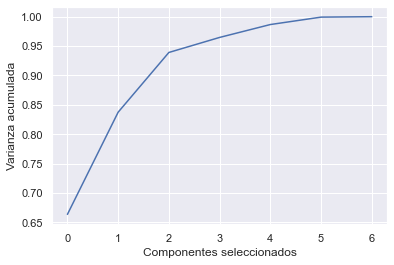

In [317]:
# Graficamos la varianza acumulada para poder seleccionar el numero de componentes a aplicar
pca_comps = PCA().fit(X_train_num)
plt.plot(np.cumsum(pca_comps.explained_variance_ratio_))
plt.xlabel('Componentes seleccionados')
plt.ylabel('Varianza acumulada');

Como se puede apreciar en el grafico, con utilizar 2 componentes estariamos captando alrededor del 80% de varianza acumulada del dataset, por lo que seleccionamos esa cantidad de componentes

In [318]:
# Cantidad de componentes a extraer
n_comps = 4
# Definimos PCA
pca = PCA(n_components = n_comps)
# fit_transform del PCA a nuestros datos
X_train_num_pca = pd.DataFrame(pca.fit_transform(X_train_num))
X_test_num_pca =  pd.DataFrame(pca.transform(X_test_num))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [319]:
# Verificamos que se hayan reducido de 7 variables a 2
print(X_train_num_pca.shape)
print(X_test_num_pca.shape)

(19866, 4)
(8515, 4)


In [320]:
# Varianza acumulada de los componentes principales
print(np.cumsum(pca.explained_variance_ratio_))

[0.66341244 0.83738036 0.93910085 0.96469784]


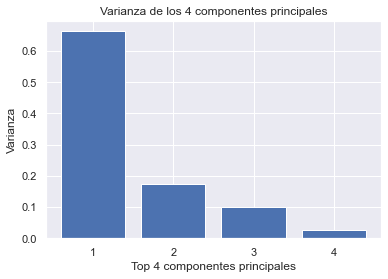

In [321]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Varianza de los ' + str(n_comps) + ' componentes principales')
plt.xlabel('Top ' +str(n_comps) + ' componentes principales')
plt.ylabel('Varianza')
plt.show()

In [322]:
# Unimos las variables categoricas a las numericas
X_train_pca = np.concatenate((X_train_num_pca,X_train_cat),axis=1)
X_test_pca = np.concatenate((X_test_num_pca,X_test_cat),axis=1)
print(X_train_pca.shape)

(19866, 48)


In [323]:
# Seteamos hiperparametros y aplicamos grid search y cross validation
grid = {"C":[0.001,0.01,0.1,1,10,100,1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_pca = logreg = LogisticRegression()
logreg_cv_pca=GridSearchCV(logreg_pca,grid,cv=10,verbose=1)
logreg_cv_pca.fit(X_train_pca,y_train)

print("Mejores hiperaparametros: ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Mejores hiperaparametros:  {'C': 100, 'penalty': 'l2'}
Accuracy : 0.8982180750913162


In [324]:
logreg_pca = LogisticRegression(C=100,penalty='l2',class_weight={ 0:0.25, 1:0.75 })
logreg_pca.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 0.25, 1: 0.75})

In [325]:
# Relizamos una prediccion con los datos de test
y_pred_test_pca = logreg_cv_pca.predict(X_test_pca)

y_pred_test_pca

# Analizamos la performance del modelo


print('Accuracy del modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_pca)))

Accuracy del modelo: 0.8951


In [326]:
# Realizamos una prediccion con los datos de entrenamiento para luego verificar si hay overfitting o underfitting
print('Score de entrenamiento: {:.4f}'.format(logreg_cv_pca.score(X_train_pca, y_train)))

print('Score de test: {:.4f}'.format(logreg_cv_pca.score(X_test_pca, y_test)))

Score de entrenamiento: 0.8985
Score de test: 0.8951


El accuracy del modelo se incremeto de 0.8887 a 0.8951, lo cual indicaría que al aplicar PCA mejora minimamente la performance del modelo